<a href="https://colab.research.google.com/github/pbhuch/GL_DecA_G4_NLP1/blob/main/GL_DecA_G4_NLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Great Learning : AIML Online Capstone -AUTOMATIC TICKET ASSIGNMENT

DecA : Group 4: NLP 1

Group Members :
1. Priya Moily
2. Priyanka Gupta
3. Avinash Balani
4. Priyank Bhuch


Importing relavant Libraries

In [1]:
!pip install ftfy
from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
import sklearn.neighbors._base

import imblearn
from imblearn.over_sampling import SMOTE

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D, Reshape, Embedding, LSTM,  TimeDistributed, Bidirectional, Lambda, Input, Add, GlobalMaxPool1D
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
#import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# to define loss
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

from itertools import islice

import re
import nltk
from nltk.corpus import stopwords

from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.utils import resample

import pickle, string

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import spacy

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

SEED = 123                 # to be able to rerun the same NN
np.random.seed(SEED)
tf.random.set_seed(SEED)

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=a187a01c188a26e589cb078903a1cbe4d4bdf579fd16b2872b8e9aafe2ed2ed0
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy


In [3]:
! pip install langdetect
from langdetect import detect

     |████████████████████████████████| 981 kB 5.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=b6e083b05db078af061406ae38007c3177e2d0b5d65b5a6af9f042f6c216fce1
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [5]:
from langdetect import detect
#import googletrans
#from googletrans import Translator

In [6]:
!pip install goslate
from goslate import Goslate

  Created wheel for goslate: filename=goslate-1.5.2-py3-none-any.whl size=11436 sha256=4c83d830b1fff8b8dbd94a461b3f9498b2b9bff19b8a7f05c6f9487cc2d8b551
  Stored in directory: /root/.cache/pip/wheels/a8/8a/c4/85425eac5e0746fd5fc898801858331e55ac386f476d65e58d
Successfully built goslate


In [7]:
!pip install spacy

In [8]:
# Load the dataset into a Pandas dataframe called "dataset" and check the head of the dataset
dataset = pd.read_excel('sample_data/input_data.xlsx', )
dataset.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [10]:
dataset.shape

(8500, 4)

In [11]:
dataset.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [12]:
# Find out the null value counts in each column
dataset.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [13]:
dataset[pd.isnull(dataset).any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [14]:
# NULL replacement
dataset.fillna(str(), inplace=True)
dataset.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [15]:
dataset[pd.isnull(dataset).any(axis=1)]

,Short description,Description,Caller,Assignment group


In [16]:
duplicate = dataset[dataset.duplicated()]

In [17]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 51 to 8405
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  83 non-null     object
 1   Description        83 non-null     object
 2   Caller             83 non-null     object
 3   Assignment group   83 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


In [18]:
dataset1 = dataset[~dataset.duplicated()]

In [19]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8417 non-null   object
 1   Description        8417 non-null   object
 2   Caller             8417 non-null   object
 3   Assignment group   8417 non-null   object
dtypes: object(4)
memory usage: 328.8+ KB


In [20]:
dataset1.insert(loc=4, 
              column='combined_description', 
              allow_duplicates=True, 
              value=list(dataset1['Short description'].str.strip() + ' ' + dataset1['Description'].str.strip()))

In [21]:
def fn_decode_to_ascii(df):
  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
  return text.decode("utf-8") 

dataset1['combined_description'] = dataset1['combined_description'].apply(fn_decode_to_ascii)

In [22]:
dataset1.head()

,Short description,Description,Caller,Assignment group,combined_description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook received from: hmjdrvpb.komuaywn@gmail...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from: eylqgodm.ybq...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


In [23]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     8417 non-null   object
 1   Description           8417 non-null   object
 2   Caller                8417 non-null   object
 3   Assignment group      8417 non-null   object
 4   combined_description  8417 non-null   object
dtypes: object(5)
memory usage: 394.5+ KB


In [25]:
dataset1.to_csv("dataset_combined.csv")

In [26]:
# Write a function to apply to the dataset to detect Mojibakes
def is_mojibake_impacted(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False
    
# Check the dataset for mojibake impact
dataset1[~dataset1.iloc[:,:].applymap(is_mojibake_impacted).all(1)]

,Short description,Description,Caller,Assignment group,combined_description
99,password expiry tomorrow,\n\nreceived from: ecprjbod.litmjwsy@gmail.com...,ecprjbod litmjwsy,GRP_0,password expiry tomorrow received from: ecprjb...
116,server issues,\r\n\r\nreceived from: bgqpotek.cuxakvml@gmail...,bgqpotek cuxakvml,GRP_0,server issues received from: bgqpotek.cuxakvml...
124,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, octobe...",tvcdfqgp nrbcqwgj,GRP_0,mobile device activation from: tvcdfqgp nrbcqw...
162,access to bex,\r\n\r\nreceived from: yfqoaepn.xnezhsit@gmail...,yfqoaepn xnezhsit,GRP_0,access to bex received from: yfqoaepn.xnezhsit...
164,æ’¤å›ž: ticket_no1564867 -- comments added,\n\nreceived from: abcdri@company.com\n\nwindy...,tycludks cjofwigv,GRP_0,: ticket_no1564867 -- comments added received ...
170,[urgent!!] delivery note creation request!!,\n\nreceived from: fbvpcytz.nokypgvx@gmail.com...,fbvpcytz nokypgvx,GRP_18,[urgent!!] delivery note creation request!! re...
177,unable to access password_management_tool id p...,i try to change now my password acc. to attach...,ijeqpkrz nwtehsyx,GRP_2,unable to access password_management_tool id p...
186,é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è...,"from: \nsent: friday, october 28, 2016 7:20 a...",yafxlpwi lhxvatkb,GRP_18,"shipment notification from: \nsent: friday, o..."
222,support fÃ¼r fa.gstry \arexjftu ohxdwngl,support fÃ¼r fa.konnica \arexjftu ohxdwngl,arexjftu ohxdwngl,GRP_24,support fr fa.gstry \arexjftu ohxdwngl support...
223,probleme mit bluescreen .,"hallo ,\n\nes ist erneut passiert. der pc hat ...",vrfpyjwi nzhvgqiw,GRP_24,"probleme mit bluescreen . hallo ,\n\nes ist er..."


In [27]:
# Take an example of row# 8471 combined_description and fix it
print('Garbled text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (dataset1['combined_description'][8471], 
                                                                        fix_text(dataset1['combined_description'][8471])))

# List all mojibakes defined in ftfy library
#print('\nMojibake Symbol RegEx:\n', badness.MOJIBAKE_SYMBOL_RE.pattern)

Garbled text:  to 
Fixed text:  to 


In [28]:
dataset1['Short description']=dataset1['Short description'].apply(fix_text)
dataset1['Description']=dataset1['Description'].apply(fix_text)
dataset1['combined_description']=dataset1['combined_description'].apply(fix_text)

In [29]:
# Visualize row#8471
dataset1.loc[8471,:]

Short description                电脑开机开不出来
Description              to 小贺,早上电脑开机开不出来
Caller                  xqyjztnm onfusvlz
Assignment group                   GRP_30
combined_description                  to 
Name: 8471, dtype: object

In [30]:
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'

In [32]:
dataset1['Language'] = dataset1['combined_description'].apply(fn_lan_detect)

In [33]:
dataset1.head()

,Short description,Description,Caller,Assignment group,combined_description,Language
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,en
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook received from: hmjdrvpb.komuaywn@gmail...,en
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from: eylqgodm.ybq...,en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no


In [34]:
dataset1['Language'].value_counts()

en    7024
de     382
af     283
it     133
no     112
fr     104
nl      76
sv      49
es      46
ca      37
da      31
pl      30
ro      17
pt      17
cy      12
tl      11
sl      10
sq       8
hr       7
fi       5
et       5
id       4
cs       3
so       3
lt       3
sk       2
lv       1
hu       1
vi       1
Name: Language, dtype: int64

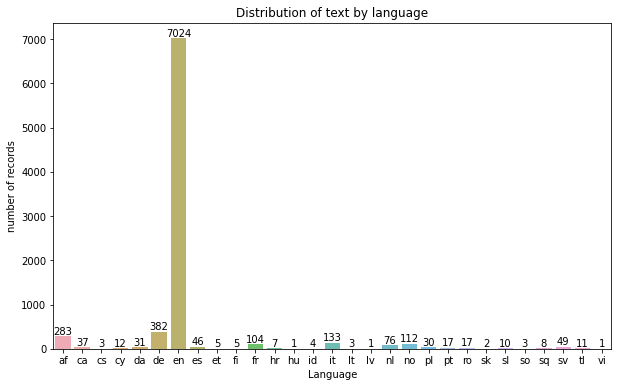

In [35]:
x = dataset1["Language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [36]:
dataset1.to_csv('dataset_mojibake_treated_LanguageDetected.csv', index=False, encoding='utf_8_sig')

In [37]:
email_regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

In [48]:
def fn_remove_irrelaventWords(df,columnName):
  for index in range(df.shape[0]):
    df[columnName][index] = df[columnName][index].lower()                                       # to lower case 
    df[columnName][index] = re.sub(email_regex,"",df.loc[index,columnName])                     # remove email address
    df[columnName][index] = re.sub(r'\S*@\S*\s?', '', df.loc[index,columnName])                 # remove email address with appended text
    df[columnName][index] = re.sub(r"received from:",' ',df.loc[index,columnName])              # remove unwanted text
    df[columnName][index] = re.sub(r"from:",' ',df.loc[index,columnName])                       # remove unwanted text
    df[columnName][index] = re.sub(r"to:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"subject:",' ',df.loc[index,columnName])                    # remove unwanted text  
    df[columnName][index] = re.sub(r"sent:",' ',df.loc[index,columnName])                       # remove unwanted text
    df[columnName][index] = re.sub(r"ic:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"cc:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"bcc:",' ',df.loc[index,columnName])                        # remove unwanted text  
    df[columnName][index] = re.sub(r'\d+','' ,df.loc[index,columnName])                         # remove numbers
    df[columnName][index] = re.sub(r'\n',' ',df.loc[index,columnName])                          # remove new line character
    df[columnName][index] = re.sub(r'#','', df.loc[index,columnName])                           # remove hashtag while keeping hashtag text
    df[columnName][index] = re.sub(r'&;?', 'and',df.loc[index,columnName])                      # remove &
    df[columnName][index] = re.sub(r'\&\w*;', '', df.loc[index,columnName])                     # remove HTML special entities (e.g. &amp;)
    df[columnName][index] = re.sub(r'https?:\/\/.*\/\w*', '', df.loc[index,columnName])         # remove hyperlinks
  return df

In [56]:
dataset1.reset_index(inplace=True)

In [57]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 8417 non-null   int64 
 1   Short description     8417 non-null   object
 2   Description           8417 non-null   object
 3   Caller                8417 non-null   object
 4   Assignment group      8417 non-null   object
 5   combined_description  8417 non-null   object
 6   Language              8417 non-null   object
dtypes: int64(1), object(6)
memory usage: 460.4+ KB


In [58]:
df_clean = fn_remove_irrelaventWords(dataset1,'combined_description')

In [61]:
df_clean.head(10)

,index,Short description,Description,Caller,Assignment group,combined_description,Language
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee a...,en
1,1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,"outlook hello team, my meetings/skype mee...",en
2,2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn hi i cannot log on to ...,en
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no
5,5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,en
6,6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,event: critical:hostname_.company.com the valu...,en
7,7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket_no- employment status - new non-employe...,en
8,8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...,en
9,9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant_ ticket update on inp...,en


In [62]:
dataset1.head(10)

,index,Short description,Description,Caller,Assignment group,combined_description,Language
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee a...,en
1,1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,"outlook hello team, my meetings/skype mee...",en
2,2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn hi i cannot log on to ...,en
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no
5,5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,en
6,6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,event: critical:hostname_.company.com the valu...,en
7,7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket_no- employment status - new non-employe...,en
8,8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...,en
9,9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant_ ticket update on inp...,en


In [63]:
df_clean.to_csv("dataset_clean_combined_description")

In [73]:
df_clean.insert(loc=7,column='ConvertedToEnglish',value = np.nan, allow_duplicates = True)

In [74]:
df_clean.head()

,index,Short description,Description,Caller,Assignment group,combined_description,Language,ConvertedToEnglish
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee a...,en,NaN
1,1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,"outlook hello team, my meetings/skype mee...",en,NaN
2,2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn hi i cannot log on to ...,en,NaN
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,en,NaN
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,NaN


In [75]:
svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
svc_urls = ['http://translate.google' + domain for domain in svc_domains]

In [77]:
gs = Goslate(service_urls=svc_urls)

In [78]:
trans_8416 = gs.translate(df_clean['combined_description'][8416], target_language='en', source_language='auto')

In [79]:
print ('Original Text : ',df_clean['combined_description'][8416])
print('Traslated to English : ',trans_8416)

Original Text :  an mehreren pc`s lassen sich verschiedene prgramdntyme nicht ffnen. an mehreren pc`s lassen sich verschiedene prgramdntyme nicht ffnen. bereich cnc.
Traslated to English :  Several prgramdntyme can not be folded on several PCs. Several prgramdntyme can not be folded on several PCs. Area CNC.


In [80]:
def fn_ConvertToEnglish(df,columnName):
  for idx in range(df.shape[0]):
    row_iter = gs.translate(df[columnName][idx],target_language='en',source_language = 'auto')
    df[columnName][idx] = str(row_iter)
  return df

In [84]:
#df_translated = fn_ConvertToEnglish(df_clean,'ConvertedToEnglish')
#df_translated.head()
#df_translated.to_csv('/sample_data/dataset_mojibaked_LangDetect_Translated.csv')')

#Importing the translated csv rather than running the code
df_translated = pd.read_csv('/content/sample_data/dataset_mojibaked_LangDetect_Translated.csv',encoding='ISO-8859-1')

In [86]:
df_translated.tail()

,Unnamed: 0,Unnamed: 0.1,Short description,Description,Caller,Assignment group,combined_description_caller,combined_description,Language,ConvertedToEnglish
8412,8412,8412,emails not coming in from zz mail,received from avglmrts.vhqmtiua@gmail.com\n go...,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail received fro...,emails not coming in from zz mail received fro...,en,emails not coming in from zz mail received fro...
8413,8413,8413,telephonysoftware issue,telephonysoftware issue,rbozivdq gmlhrtvp,GRP_0,telephonysoftware issue telephonysoftware issu...,telephonysoftware issue telephonysoftware issue,en,telephonysoftware issue telephonysoftware issue
8414,8414,8414,vip windows password reset for tifpdchb pedxruyf,vip windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,GRP_0,vip windows password reset for tifpdchb pedxru...,vip windows password reset for tifpdchb pedxru...,en,vip windows password reset for tifpdchb pedxru...
8415,8415,8415,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...,en,machine nÃ£o estÃ¡ funcionando i am unable to ...
8416,8416,8416,an mehreren pcs lassen sich verschiedene prgra...,an mehreren pcs lassen sich verschiedene prgra...,kqvbrspl jyzoklfx,GRP_49,an mehreren pcs lassen sich verschiedene prgra...,an mehreren pcs lassen sich verschiedene prgra...,de,Several PCs can not open various prgramdntyms ...


In [87]:
df_translated = df_translated.drop(columns=['Unnamed: 0','Unnamed: 0.1','Short description','Description','combined_description_caller'],axis=1)

In [88]:
df_translated.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish
0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verified user detailsemployee mana...
1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook received from hello team my meetingssk...
2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,cant log in to vpn received from hi i cannot l...
3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable to access hrtool page unable to access ...
4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error


In [89]:
df_ML = df_translated.copy()
df_DL = df_translated.copy()

In [90]:
print(df_ML.shape)
print(df_DL.shape)

(8417, 5)
(8417, 5)


In [91]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [92]:
stopwords = set(stopwords.words('english'))
 # Remove stopwords
df_ML['ConvertedToEnglish'] = df_ML['ConvertedToEnglish'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [93]:
#lemmatization
# Initialize spacy 'en' medium model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en', disable=['parser', 'ner'])

# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

In [94]:
print('\033[1mOriginal text:\033[0m')
print(df_ML['ConvertedToEnglish'][50])
print('_'*100)
print('\033[1mLemmatized text:\033[0m')
print(lemmatizer(df_ML['ConvertedToEnglish'][50]))

Original text:
job mmzscrdlymerktc failed jobscheduler received job mmzscrdlymerktc failed jobscheduler
____________________________________________________________________________________________________
Lemmatized text:
job mmzscrdlymerktc fail jobscheduler receive job mmzscrdlymerktc fail jobscheduler


In [95]:
df_ML['ConvertedToEnglish'] = df_ML['ConvertedToEnglish'].apply(lemmatizer)

In [96]:
df_ML.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish
0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verify user detailsemployee manage...
1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook receive hello team meetingsskype meeti...
2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,can not log vpn receive hi can not log vpn best
3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable access hrtool page unable access hrtool...
4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error


In [97]:
df_ML.to_csv("dataset_Cleaned_Translated_StopWords_Lemmatized.csv")

In [98]:
df_ML.columns

Index(['Caller', 'Assignment group', 'combined_description', 'Language',
       'ConvertedToEnglish'],
      dtype='object')

In [99]:
df_ML.insert(loc=5,column='pred_group',value=np.nan,allow_duplicates=True)

In [100]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Caller                8417 non-null   object 
 1   Assignment group      8417 non-null   object 
 2   combined_description  8417 non-null   object 
 3   Language              8417 non-null   object 
 4   ConvertedToEnglish    8417 non-null   object 
 5   pred_group            0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 394.7+ KB


In [101]:
def deterministicRules(df,columnName):
  for i in range(df.shape[0]):
      #1 Contains telephony_software > GRP_7
    if pd.notna(df[columnName][i]):
      if ('telephonysoftware' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_7'
      #2 contains cutview >  GRP_66
      elif ('cutview' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_66'
      #3 contains engg application >  GRP_58
      elif ('engg application' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_58'
      #4 contains ethics >  GRP_23
      elif ('ethics' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_23'
      # contains crm dynamics >  GRP_22
      elif ('crm dynamics' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_22'
      # contains distributor tool & company center >  GRP_21
      elif ('distributor tool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_21'
      elif ('company center' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_21'
      # contains bpctwhsn kzqsbmtp & network outage or circuit outage >  GRP_8
      elif (df['Caller'][i] == 'bpctwhsn kzqsbmtp' and ('network outage' in df[columnName][i] or 'circuit outage' in df[columnName][i])):
        df['pred_group'][i] = 'GRP_8'
      elif ('reset passwords' in df[columnName][i] and 'the' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_17'
      elif (df[columnName][i].startswith('erp access issue')):
        df['pred_group'][i] = 'GRP_2'
      elif ('vsphere' in df[columnName][i] or 'esxi' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_12'
      elif ('windows account' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('erp sid account lock' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('erp sid password reset' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif(df['Caller'][i] == 'jionmpsf wnkpzcmv' and 'eutool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_24'
      elif(df['Caller'][i] == 'cwrikael oanmsecr' and 'eutool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('sso portal' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_73'
      elif ('unable complete forecast' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_67'
      elif (df[columnName][i].startswith('timecard') or df[columnName][i].startswith('time card')):
        df['pred_group'][i] = 'GRP_36'

In [102]:
deterministicRules(df_ML,'ConvertedToEnglish')

In [103]:
df_ML.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,pred_group
0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verify user detailsemployee manage...,NaN
1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook receive hello team meetingsskype meeti...,NaN
2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,can not log vpn receive hi can not log vpn best,NaN
3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable access hrtool page unable access hrtool...,NaN
4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error,NaN


In [105]:
df_determinted = df_ML[~df_ML['pred_group'].isna()]

In [106]:
df_determinted.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,pred_group
18,nqdyowsm yqerwtna,GRP_0,erp sid account locked erp sid account locked,en,erp sid account lock erp sid account lock,GRP_0
49,aofnvyzt eqiyskhm,GRP_7,status does not change on telephonysoftware wh...,en,status change telephonysoftware closing call a...,GRP_7
80,ilvortuq zfgrlewm,GRP_0,erp sid account locked erp sid account locked,en,erp sid account lock erp sid account lock,GRP_0
154,hckvpary emxbpkwy,GRP_17,reset passwords for hckvpary emxbpkwy using pa...,en,reset passwords hckvpary emxbpkwy use password...,GRP_17
162,kcipjago mlkptgvb,GRP_0,windows account lockout windows account lockout,en,windows account lockout windows account lockout,GRP_0


In [107]:
df_determinted['pred_group'].value_counts()

GRP_0     125
GRP_7      83
GRP_2      27
GRP_21     21
GRP_22     15
GRP_66      7
GRP_23      6
GRP_36      4
GRP_12      4
GRP_24      3
GRP_17      2
GRP_58      2
GRP_73      1
GRP_67      1
Name: pred_group, dtype: int64

In [108]:
df_ML.to_csv("df_ML")
df_DL.to_csv("df_DL")